1. Migration trajectory of 3 birds Éric, Nico & Sane based on latitide and Longitude
2. Daily mean speed of birds


In [16]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import datetime
import pandas as pd

from google.colab import files
uploaded = files.upload()
bird_data = pd.read_csv('bird_tracking.csv')
bird_data.info()

Saving bird_tracking.csv to bird_tracking (4).csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61920 entries, 0 to 61919
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          61920 non-null  int64  
 1   altitude            61920 non-null  int64  
 2   date_time           61920 non-null  object 
 3   device_info_serial  61920 non-null  int64  
 4   direction           61477 non-null  float64
 5   latitude            61920 non-null  float64
 6   longitude           61920 non-null  float64
 7   speed_2d            61477 non-null  float64
 8   bird_name           61920 non-null  object 
dtypes: float64(4), int64(3), object(2)
memory usage: 4.3+ MB


In [17]:
bird_data.head()

,Unnamed: 0,altitude,date_time,device_info_serial,direction,latitude,longitude,speed_2d,bird_name
0,0,71,2013-08-15 00:18:08+00,851,-150.469753,49.419860,2.120733,0.150000,Eric
1,1,68,2013-08-15 00:48:07+00,851,-136.151141,49.419880,2.120746,2.438360,Eric
2,2,68,2013-08-15 01:17:58+00,851,160.797477,49.420310,2.120885,0.596657,Eric
3,3,73,2013-08-15 01:47:51+00,851,32.769360,49.420359,2.120859,0.310161,Eric
4,4,69,2013-08-15 02:17:42+00,851,45.191230,49.420331,2.120887,0.193132,Eric


In [6]:
pip install cython

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
pip install scipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Making 2d Plots for bird Eric

In [5]:
print(bird_data.bird_name.unique())

#assign eric to bird 1 
bird_1 = bird_data.bird_name == "Eric"
type(bird_1)

['Eric' 'Nico' 'Sanne']


pandas.core.series.Series

In [6]:
x,y = bird_data.longitude[bird_1], bird_data.latitude[bird_1]
len(x) == len(y)


True

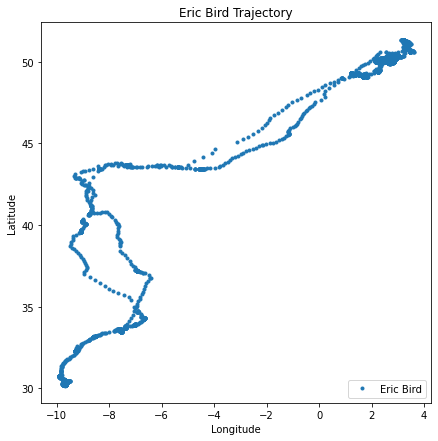

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,7))
plt.xlabel("Longitude")
plt.ylabel("Latitude")


plt.plot(x,y,".", label ='Eric Bird')
plt.legend(loc="lower right")
plt.title('Eric Bird Trajectory')
plt.savefig("eric_traj.pdf")


# Trajectory Plots for all 3 birds

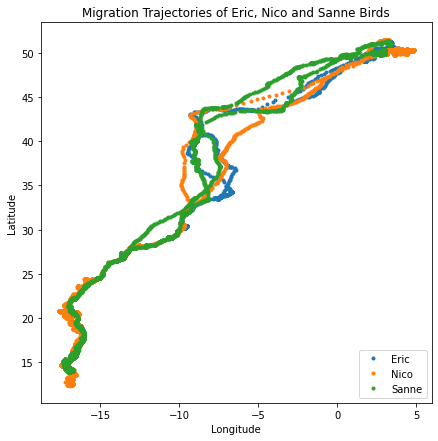

In [8]:
import matplotlib.pyplot as plt

bird_uniq_lst = bird_data.bird_name.unique()

plt.figure(figsize=(7,7))
plt.xlabel("Longitude")
plt.ylabel("Latitude")

for i in bird_uniq_lst:
    bird = bird_data.bird_name == i
    x,y = bird_data.longitude[bird], bird_data.latitude[bird]
    plt.plot(x,y,".",label=i)
    plt.legend(loc="lower right")
    plt.title('Migration Trajectories of Eric, Nico and Sanne Birds')
plt.savefig("birds_traj.pdf")

## Time Series Estimation 

Field following second is UTC, which stands for coordinated universal time,which is an offset that is expressed in hours.

In [9]:
bird_data.date_time

0        2013-08-15 00:18:08+00
1        2013-08-15 00:48:07+00
2        2013-08-15 01:17:58+00
3        2013-08-15 01:47:51+00
4        2013-08-15 02:17:42+00
                  ...          
61915    2014-04-30 22:00:08+00
61916    2014-04-30 22:29:57+00
61917    2014-04-30 22:59:52+00
61918    2014-04-30 23:29:43+00
61919    2014-04-30 23:59:34+00
Name: date_time, Length: 61920, dtype: object

In [10]:
# check the type of the object
type(bird_data.date_time[0])
a = bird_data.date_time[0]

In [11]:
import datetime
datetime.datetime.strptime(a[:-3],"%Y-%m-%d %H:%M:%S")

datetime.datetime(2013, 8, 15, 0, 18, 8)

#### Convert time stamp string to date time objects 

In [12]:
time_stamps =[]
for i in range(len(bird_data)):
    ts = datetime.datetime.strptime(bird_data.date_time.iloc[i][:-3],"%Y-%m-%d %H:%M:%S")
    time_stamps.append(ts)

bird_data['timestamps'] = time_stamps

In [13]:
bird_data

,Unnamed: 0,altitude,date_time,device_info_serial,direction,latitude,longitude,speed_2d,bird_name,timestamps
0,0,71,2013-08-15 00:18:08+00,851,-150.469753,49.419860,2.120733,0.150000,Eric,2013-08-15 00:18:08
1,1,68,2013-08-15 00:48:07+00,851,-136.151141,49.419880,2.120746,2.438360,Eric,2013-08-15 00:48:07
2,2,68,2013-08-15 01:17:58+00,851,160.797477,49.420310,2.120885,0.596657,Eric,2013-08-15 01:17:58
3,3,73,2013-08-15 01:47:51+00,851,32.769360,49.420359,2.120859,0.310161,Eric,2013-08-15 01:47:51
4,4,69,2013-08-15 02:17:42+00,851,45.191230,49.420331,2.120887,0.193132,Eric,2013-08-15 02:17:42
...,...,...,...,...,...,...,...,...,...,...
61915,61915,11,2014-04-30 22:00:08+00,833,45.448157,51.352572,3.177151,0.208087,Sanne,2014-04-30 22:00:08
61916,61916,6,2014-04-30 22:29:57+00,833,-112.073055,51.352585,3.177144,1.522662,Sanne,2014-04-30 22:29:57
61917,61917,5,2014-04-30 22:59:52+00,833,69.989037,51.352622,3.177257,3.120545,Sanne,2014-04-30 22:59:52
61918,61918,16,2014-04-30 23:29:43+00,833,88.376373,51.354641,3.181509,0.592115,Sanne,2014-04-30 23:29:43


In [14]:
bird_data.timestamps[0]

Timestamp('2013-08-15 00:18:08')

#### Compute elapsed time  

In [15]:
elapsed_time =[]
for time in bird_data.timestamps:
    t = time -bird_data.timestamps[0]
    elapsed_time.append(t)
elapsed_time[1000]

Timedelta('12 days 02:02:00')

In [16]:
#represent elapse time i days

print(elapsed_time[1000]/ datetime.timedelta(days=1))

#represent elapse time i hours
print(elapsed_time[1000]/ datetime.timedelta(hours=1))

12.084722222222222
290.03333333333336


#### Graph to plot elapsed_time against timedelta 

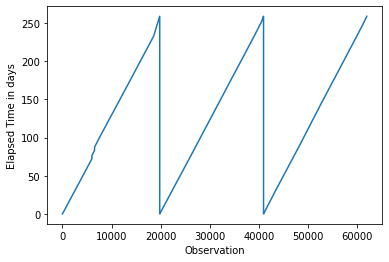

In [17]:
##  plt.plot(elapsed_time/datetime.timedelta(days=1))  -
## cannot use this as  datetime.timedelta function is not supported on the lists like, elapsed time 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import datetime
import pandas as pd

plt.plot(np.array(elapsed_time)/datetime.timedelta(days=1))
plt.xlabel("Observation")
plt.ylabel("Elapsed Time in days")
plt.savefig("Elapsed time.pdf")


### Daily Mean Speed 

In [18]:
bird_data['elapsed_days'] = np.array(elapsed_time)/datetime.timedelta(days=1)

In [19]:
j=0
indices =[]
dms =[]
for i in range(len(bird_data)):
    if bird_data.elapsed_days[i] < j+1:
        indices.append(i)
    else:
        dms.append(np.mean(bird_data.speed_2d[indices]))
        j=j+1
        indices=[]
        

In [20]:
# check no of days
j = len(dms)

#no of indices
len(indices)

42171

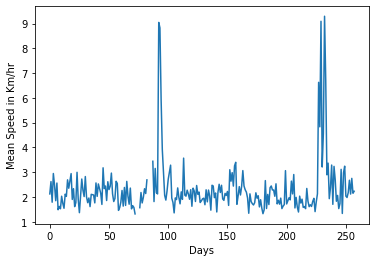

In [21]:
plt.xlabel("Days")
plt.ylabel("Mean Speed in Km/hr");
plt.plot(dms)
plt.savefig("dms.pdf")

In [25]:
pip install cartopy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
proj = ccrs.Mercator()
plt.figure(figsize=(10,10))
ax =plt.axes(projection =proj)
ax.set_extent((-25,20,52,10))

In [1]:
for i in bird_uniq_lst:
  bird = bird_data.bird_name == i
  x,y = bird_data.longitude[bird], bird_data.latitude[bird]  
  ax.plot(x,y,'.',transform=ccrs.Geodetic(),label =i)
  plt.legend(loc="upper left")
plt.title('Migration Trajectories of Eric, Nico and Sanne Birds - geodesic Plotting')
plt.savefig("map.pdf")

NameError: ignored